In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import constants, interpolate
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks, savgol_filter
import glob
import os


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
all_files_cv = os.listdir('C:/Users/MiAir/Desktop/Измерения/GaN/Sample 2/Measurments 23.03/CVF 23.03/')  
print(all_files_cv)

['K100100.TXT', 'K100200.TXT', 'K100300.TXT', 'K10050.TXT', 'K10100.TXT', 'K10200.TXT', 'K10300.TXT', 'K1050.TXT', 'K1100.TXT', 'K1200.TXT', 'K1300.TXT', 'K150.TXT', 'M1100.TXT', 'M1200.TXT', 'M1300.TXT', 'M150.TXT']


In [3]:
all_files_vac = os.listdir('C:/Users/MiAir/Desktop/Измерения/GaN/Sample 2/Measurments 23.03/VAC 23.03/')  
print(all_files_vac)

['[2]VAC[1].txt', '[2]VAC[2].txt', '[2]VAC[3].txt', '[2]VAC[4].txt', '[2]VAC[5].txt', '[2]VAC[6].txt', '[2]VAC[7].txt', '[2]VAC[8].txt']


In [346]:
def read_cap(file):
    data = pd.read_csv(file, sep='\t',skiprows=([i for i in range(0, 20)] +
                                                [j for j in range(422, 829)]), usecols=['Bias', 'Data Trace Real'])
    data['1_over_C2'] = data['Data Trace Real'].apply(lambda x: 1/x**2)
    return data.rename(columns={'Data Trace Real': 'Capacity'})
    
    
def read_cond(file):
    data = pd.read_csv(file, sep='\t',skiprows=427, usecols=['Bias', 'Data Trace Real'])
    return data.rename(columns={'Data Trace Real': 'Conductivity'})

In [362]:
cond_100K50 = read_cond('K10050.TXT')
cond_10K50 = read_cond('K1050.TXT') 
cond_1K50 = read_cond('K150.TXT')
cond_1M50 = read_cond('M150.TXT') 

cond_100K100 = read_cond('K100100.TXT')
cond_10K100 = read_cond('K10100.TXT') 
cond_1K100 = read_cond('K1100.TXT')
cond_1M100 = read_cond('M1100.TXT') 

cond_100K200 = read_cond('K100200.TXT')
cond_10K200 = read_cond('K10200.TXT') 
cond_1K200 = read_cond('K1200.TXT')
cond_1M200 = read_cond('M1200.TXT') 

cond_100K300 = read_cond('K100300.TXT')
cond_10K300 = read_cond('K10300.TXT') 
cond_1K300 = read_cond('K1300.TXT')
cond_1M300 = read_cond('M1300.TXT') 

In [363]:
cap_100K50 = read_cap('K10050.TXT')
cap_10K50 = read_cap('K1050.TXT') 
cap_1K50 = read_cap('K150.TXT')
cap_1M50 = read_cap('M150.TXT') 

cap_100K100 = read_cap('K100100.TXT')
cap_10K100 = read_cap('K10100.TXT') 
cap_1K100 = read_cap('K1100.TXT')
cap_1M100 = read_cap('M1100.TXT') 

cap_100K200 = read_cap('K100200.TXT')
cap_10K200 = read_cap('K10200.TXT') 
cap_1K200 = read_cap('K1200.TXT')
cap_1M200 = read_cap('M1200.TXT') 

cap_100K300 = read_cap('K100300.TXT')
cap_10K300 = read_cap('K10300.TXT') 
cap_1K300 = read_cap('K1300.TXT')
cap_1M300 = read_cap('M1300.TXT') 

In [367]:
cap_1M100['Bias'].max()

0.0

In [349]:
cap_100K50.head(3)

,Bias,Capacity,1_over_C2
0,-3.000,-2.777174e-08,1.296564e+15
1,-2.992,-2.769280e-08,1.303966e+15
2,-2.985,-2.759736e-08,1.313001e+15


In [383]:
cap_list_50 = [cap_1M50, cap_100K50, cap_10K50, cap_1K50] 
cap_list_100 = [cap_1M100, cap_100K100, cap_10K100, cap_1K100]
cap_list_200 = [cap_1M200, cap_100K200, cap_10K200, cap_1K200]  
cap_list_300 = [cap_1M300, cap_100K300, cap_10K300, cap_1K300 ]

In [351]:
cond_list_50 = [cond_1M50, cond_100K50, cond_10K50, cond_1K50] 
cond_list_100 = [cond_1M100, cond_100K100, cond_10K100, cond_1K100]
cond_list_200 = [cond_1M200, cond_100K200, cond_10K200, cond_1K200]  
cond_list_300 = [cond_1M300, cond_100K300, cond_10K300, cond_1K300 ]

In [10]:
# def cv_plot(list):
#     i = 0
#     fig, axs = plt.subplots(len(list), 2, gridspec_kw={'hspace': 0.25, 'wspace': 0.3}, figsize=(30,18))
#     for item in list:
#         axs[i, 0].scatter(x=item['Bias'], y=item['Capacity'])
#         axs[i, 0].set_title('Вольт-фарадная характеристика')
#         axs[i, 0].set(xlabel = 'Bias, V',ylabel ='Capacity, f' )

#         axs[i, 1].scatter(x=item['Bias'], y=item['1_over_C2'])
#         axs[i, 1].set_title('1/C^2(V)')
#         axs[i, 1].set(xlabel = 'Bias, V',ylabel ='1/C^2' )
        
#         axs[i, 0].grid()
#         axs[i, 1].grid()
#         i+=1

# plt.savefig('C-V_char.png')
    

In [36]:
# График зависимости емкости и проводимости от напряжения при разных частотах для определенной температуры
def cgv_plot(list1, list2, T):
    for i in range (0, len(list1)):
        fig, axs = plt.subplots(1, 3, gridspec_kw={'hspace': 0.25, 'wspace': 0.3}, figsize=(16,5))

        plt.subplot(121)
        plt.plot(list1[i]['Bias'],list1[i]['Conductivity'])
        plt.title(' Зависимость проводмости от U при T={} K'.format(T))
        plt.xlabel('Bias, V',fontsize='x-large')
        plt.ylabel('Conductivity, S',fontsize='x-large')
        plt.grid()
        
        plt.subplot(122)
        plt.plot(list2[i]['Bias'],list2[i]['Capacity'])
        plt.title(' Вольт-фарадная характеристика при {}K'.format(T))
        plt.xlabel('Bias, V',fontsize='x-large')
        plt.ylabel('Capacitance, F',fontsize='x-large')
        plt.grid()
        
    plt.savefig('cgv_{}K_all_freq.png'.format(T))
        

In [386]:
# Построение ВХ и обратной зависимости напряжения от C^2 для листа  мо значениями
freqs = ['1MHz', '100KHz', '10KHz', '1KHz']
def cv_plot(list, T, lim_C2, lim_V):
    i = 0
    for data in list:
        fig, axs = plt.subplots(1, 2, gridspec_kw={'hspace': 0.25, 'wspace': 0.3}, figsize=(16,5))

        plt.subplot(121)
        plt.plot(data['Bias'],data['Capacity'])
        plt.title(' Вольт-фарадная характеристика при {0}K {1}'.format(T, freqs[i]))
        plt.xlabel('Bias, V',fontsize='x-large')
        plt.ylabel('Capacitance, F',fontsize='x-large')
        plt.grid()
        
        plt.subplot(122)
        plt.scatter(data['Bias'].loc[(data['1_over_C2']<lim_C2) & (data['Bias'] > -2) & (data['Bias'] < lim_V)],
                    data['1_over_C2'].loc[(data['1_over_C2']<lim_C2) & (data['Bias'] > -2) & (data['Bias'] < lim_V)])
        plt.title(' 1/C^2 от U')
        plt.xlabel('Bias, V',fontsize='x-large')
        plt.ylabel('1/C^2, 1/F^2',fontsize='x-large')
        plt.grid()
        i+=1
    fig.savefig('Graphs/cv_plot_{0}.png'.format(T))


In [393]:
def cv_all(list, T, lim_C2, lim_V1,lim_V2):
    fig, axs = plt.subplots(figsize=(15,10))
    axs.xaxis.set_major_locator(MultipleLocator(0.2))
#     axs.yaxis.set_major_locator(MultipleLocator(5e-10))
    for data in list:
        plt.scatter(data['Bias'].loc[(data['Bias']>lim_V1) & (data['Bias']<lim_V2)],
                 data['Capacity'].loc[(data['Bias']>lim_V1) & (data['Bias']<lim_V2)])
    plt.legend(('1MHz', '100KHz', '10KHz', '1KHz'), loc=(0.6, 0.2), handlelength=1.5, fontsize=16)
    plt.title(' Вольт-фарадная характеристика при {}K'.format(T))     
    plt.xlabel('Bias, V',fontsize='x-large')
    plt.ylabel('Capacitance, F',fontsize='x-large')
    plt.grid()
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    
    fig.savefig('Graphs/cv_fulldiap_{0}.png'.format(T))
    

In [392]:
def gv_all(list, T, lim_C2, lim_V1,lim_V2):
    fig, axs = plt.subplots(figsize=(15,10))
    axs.xaxis.set_major_locator(MultipleLocator(0.2))
#     axs.yaxis.set_major_locator(MultipleLocator())
    for data in list:
        plt.scatter(data['Bias'].loc[(data['Bias']>lim_V1) & (data['Bias']<lim_V2)],
                 data['Conductivity'].loc[(data['Bias']>lim_V1) & (data['Bias']<lim_V2)])
    plt.legend(('1MHz', '100KHz', '10KHz', '1KHz'), loc=(0.65, 0.75), handlelength=1.5, fontsize=16)
        
    plt.title(' Зависимость проводимости от напряжения при {}K'.format(T))     
    plt.xlabel('Bias, V',fontsize='x-large')
    plt.ylabel('Conductivity, S',fontsize='x-large')
    plt.grid()
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    
    fig.savefig('Graphs/gv_all_{0}.png'.format(T))

In [310]:
S = 1e-6
def params(data, x1, x2, i, T):
#    x1 - left bias lim
#    x2 - right bias lim
    coefficients = 0
    V_d = 0
    N_d = 0
    coefficients = np.polyfit(data['Bias'].loc[(data['Bias']>x1)&(data['Bias']<x2)], 
                              y=data['1_over_C2'].loc[(data['Bias']>x1) & (data['Bias']<x2)], deg=1)
    polynom = np.poly1d(coefficients)
    V_d = coefficients[0]/coefficients[1]                                                                                         
    N_d = abs(2/(constants.e*constants.epsilon_0*S**2*eps)/polynom[1])
    print(polynom)
    print('V_d = ', V_d.round(2),'B')
    print('N_d =',   f'{N_d:.4e}')
    print('E_C - E_F = ', (constants.k * T * np.log(N_c[i]/N_d)/constants.e).round(4), 'eV')

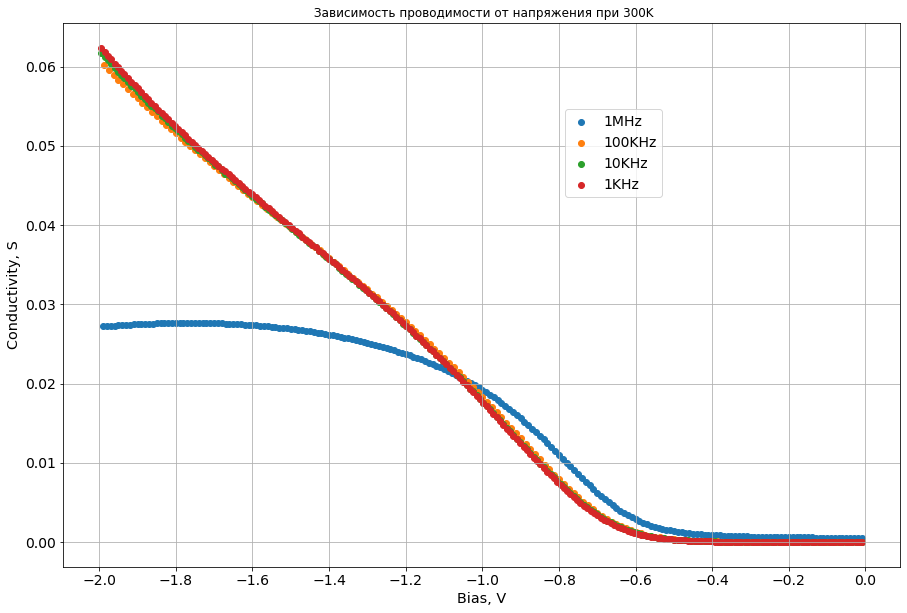

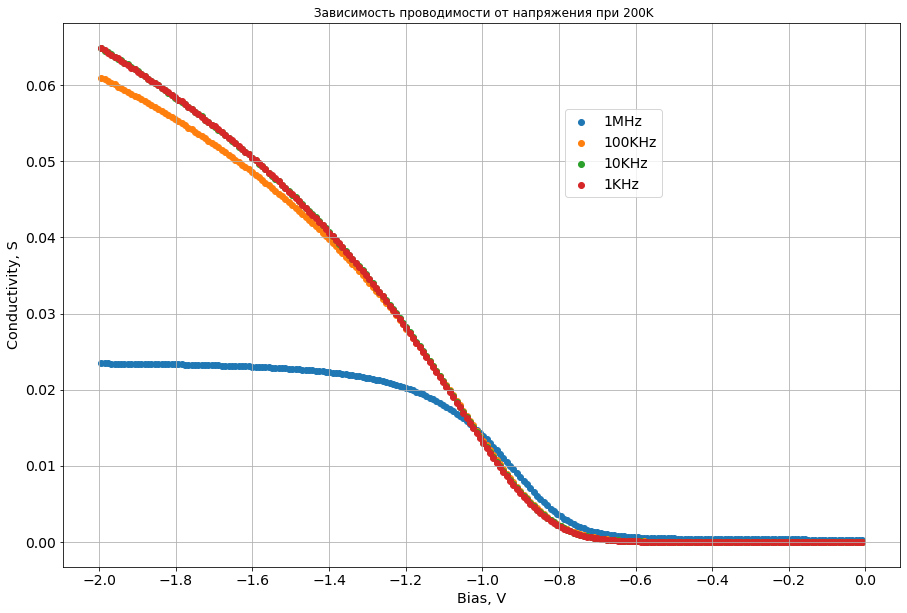

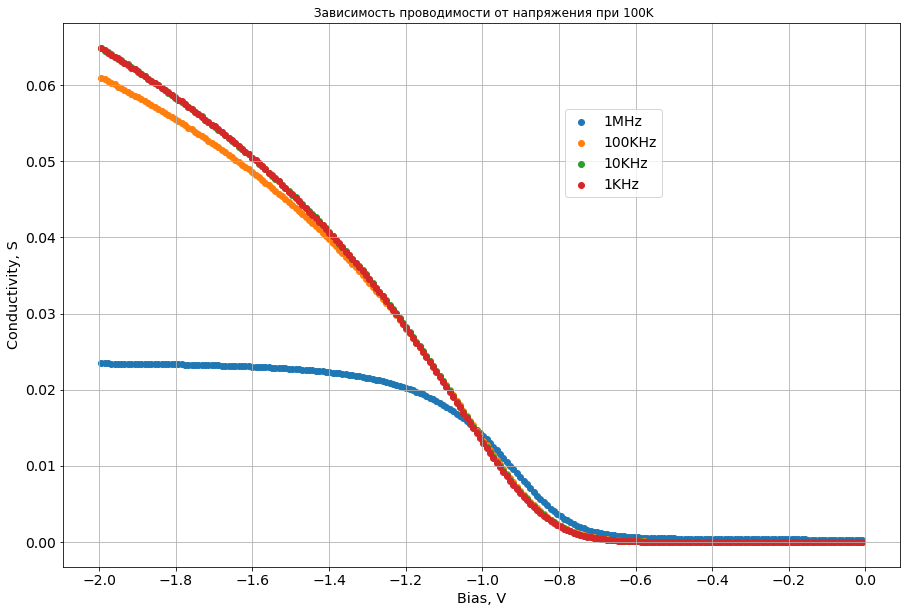

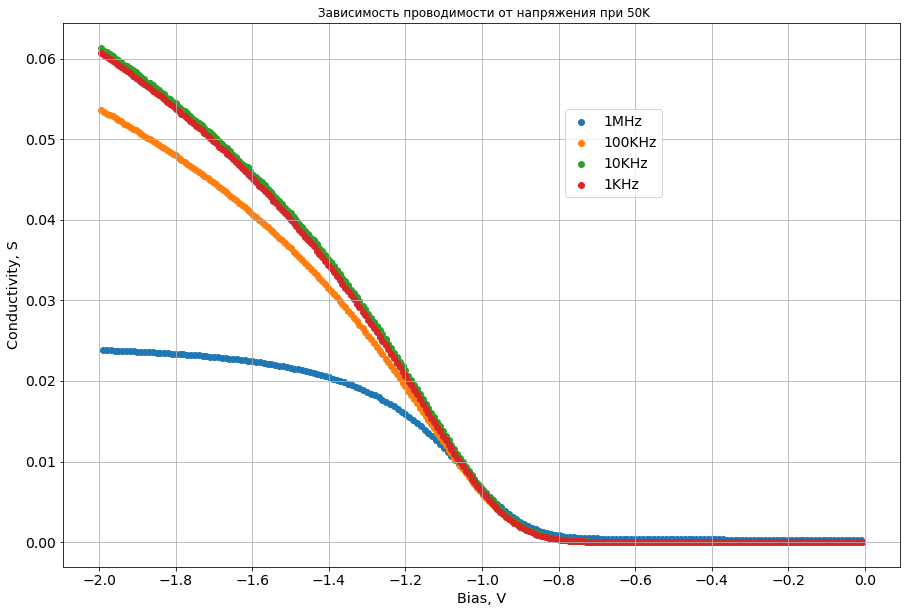

In [370]:
gv_all(cond_list_300, 300, 1e20, -2, 0)
gv_all(cond_list_200, 200, 1e20, -2, 0)
gv_all(cond_list_200, 100, 1e20, -2, 0)
gv_all(cond_list_50, 50, 1e20, -2, 0)

In [353]:
cap_list_50 = [cap_1M50, cap_100K50, cap_10K50] 
cap_list_100 = [cap_1M100, cap_100K100, cap_10K100]
cap_list_200 = [cap_1M200, cap_100K200, cap_10K200]  
cap_list_300 = [cap_1M300, cap_100K300, cap_10K300]

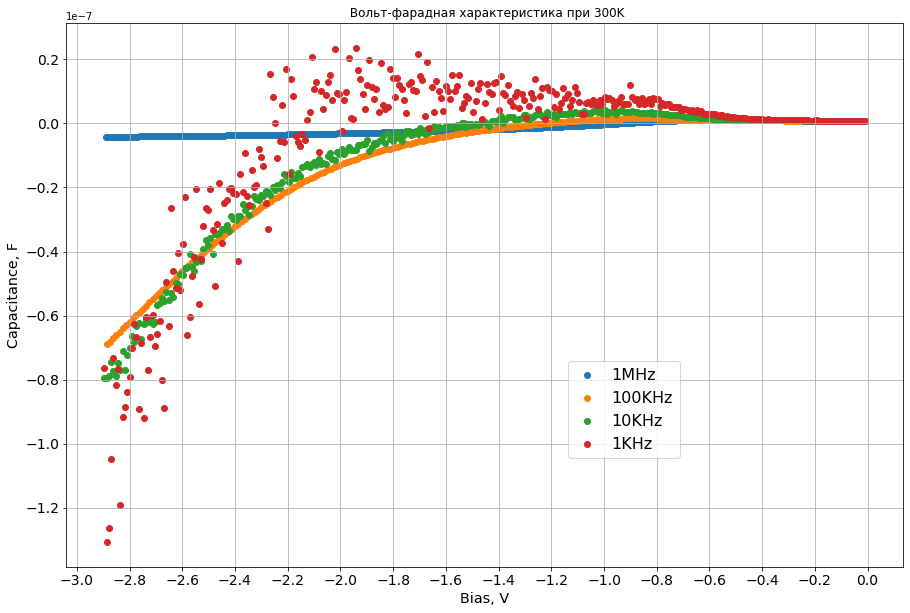

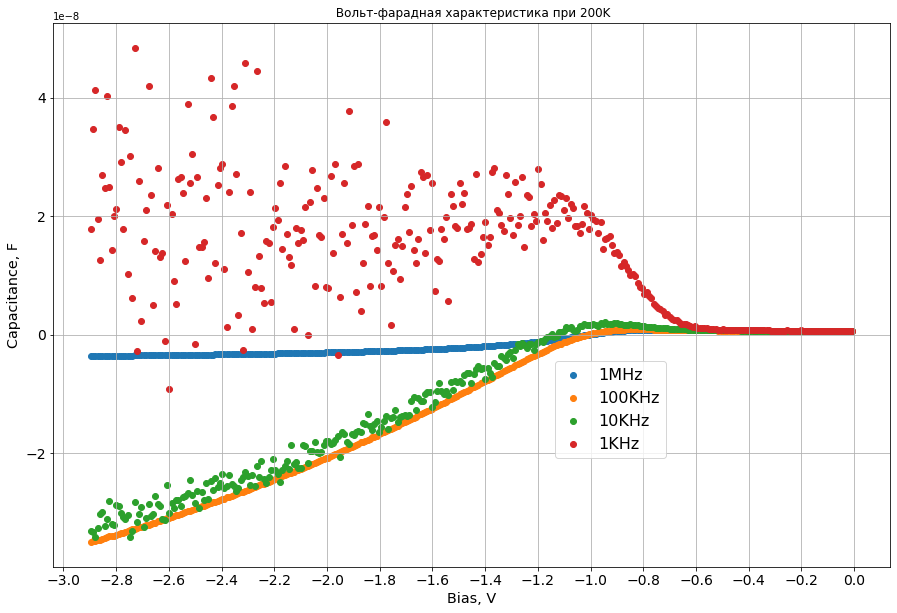

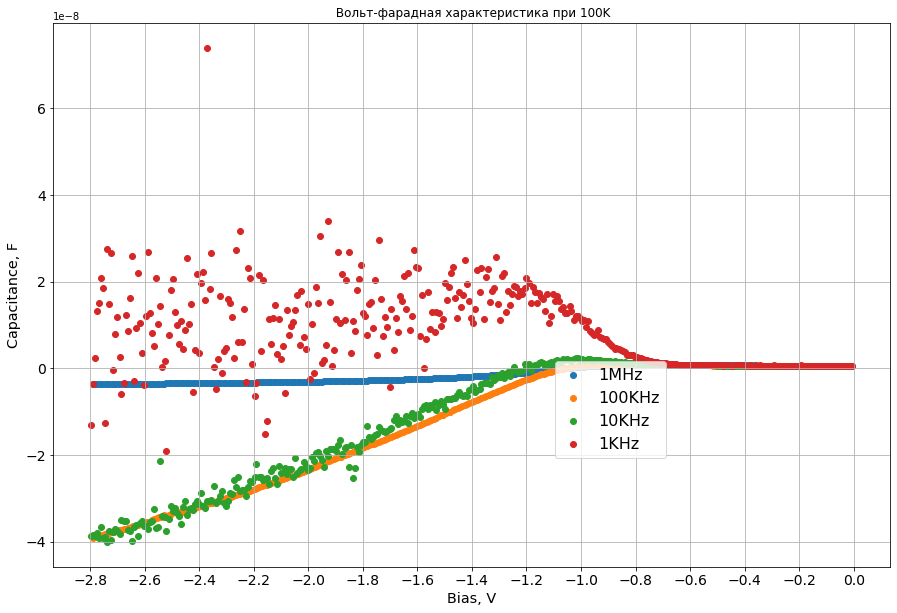

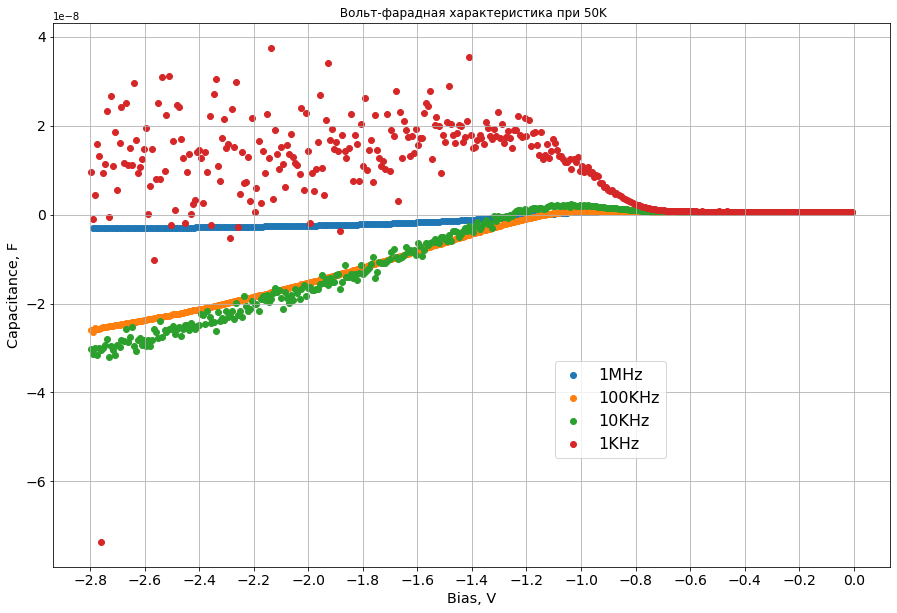

In [395]:
cv_all(cap_list_300, 300, 1e20, -2.9, 0)
cv_all(cap_list_200, 200, 1e20, -2.9, 0)
cv_all(cap_list_100, 100, 1e20, -2.8, 0)
cv_all(cap_list_50, 50, 1e20, -2.8, 0)

 
1.474e+18 x + 1.626e+18
V_d =  1.1 B
 
1.624e+18 x + 2.426e+18
V_d =  1.49 B
 
1.721e+18 x + 2.78e+18
V_d =  1.62 B
 
1.874e+18 x + 3.394e+18
V_d =  1.81 B


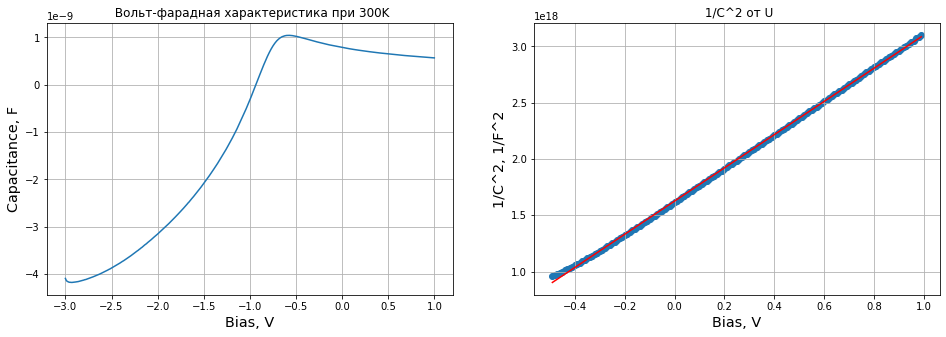

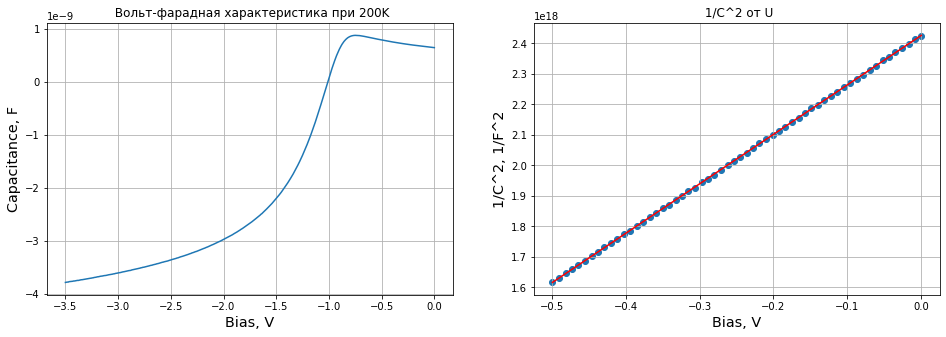

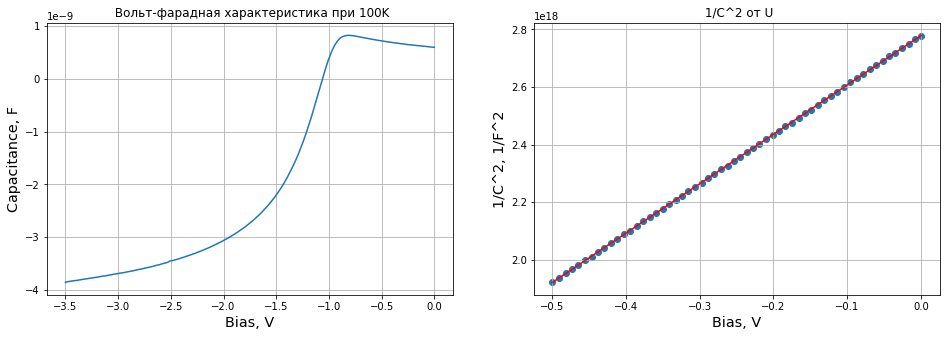

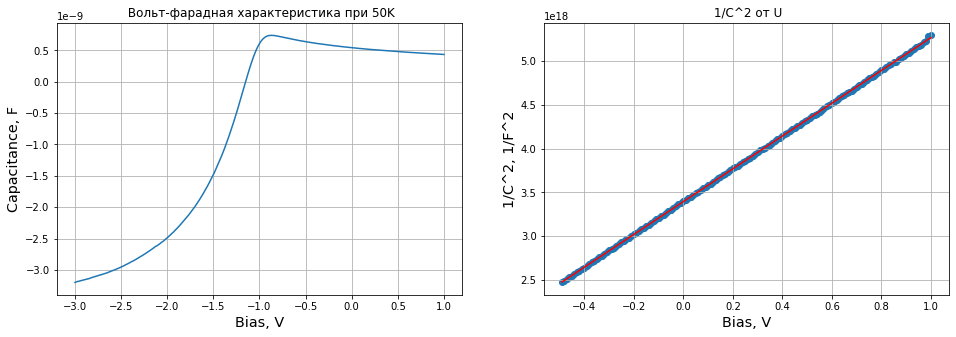

In [385]:
cv_char_plot(cap_1M300, -0.5, 1, 300, '1M')
cv_char_plot(cap_1M200, -0.5, 1, 200, '1M')
cv_char_plot(cap_1M100, -0.5, 2, 100, '1M')
cv_char_plot(cap_1M50, -0.5, 1.2, 50, '1M')
plt.savefig('Graphs/1_over_c2_1M.png')

 
1.555e+18 x + 1.791e+18
V_d =  1.15 B
 
1.778e+18 x + 2.803e+18
V_d =  1.58 B
 
1.879e+18 x + 3.143e+18
V_d =  1.67 B
 
1.977e+18 x + 3.531e+18
V_d =  1.79 B


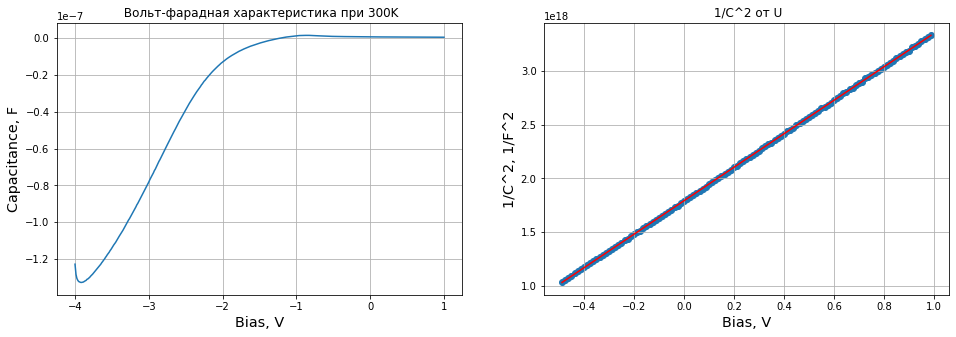

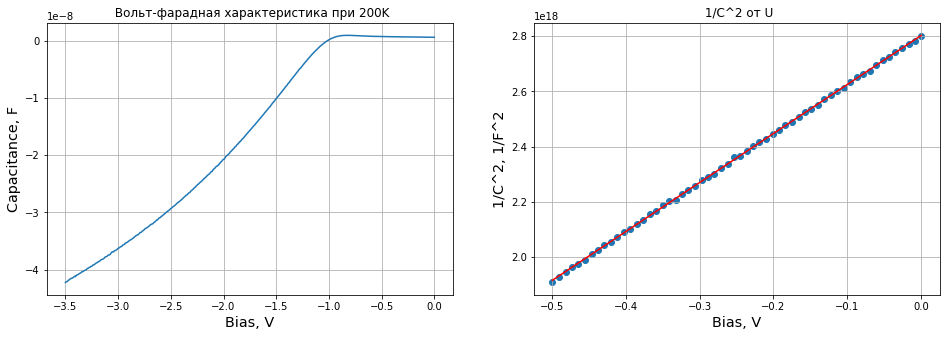

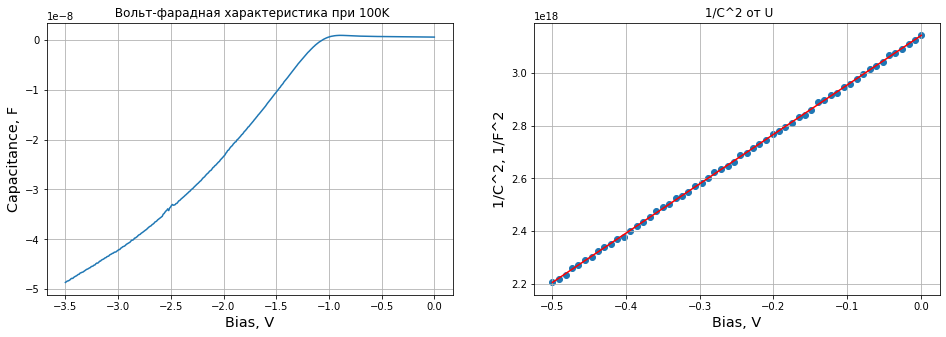

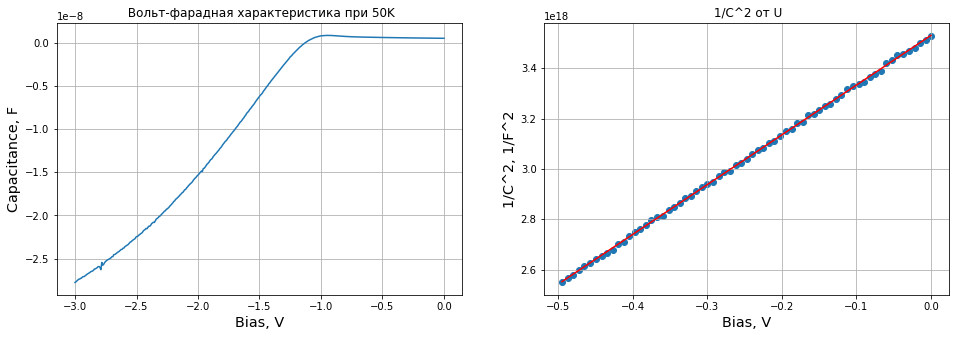

In [226]:
cv_char_plot(cap_100K300, -0.5, 1, 300, '100k')
cv_char_plot(cap_100K200, -0.5, 1, 200, '100k')
cv_char_plot(cap_100K100, -0.5, 2, 100, '100k')
cv_char_plot(cap_100K50, -0.5, 1.2, 50, '100k')

 
1.765e+18 x + 1.716e+18
V_d =  0.97 B
 
1.7e+18 x + 2.586e+18
V_d =  1.52 B
 
1.891e+18 x + 3.082e+18
V_d =  1.63 B
 
1.938e+18 x + 3.292e+18
V_d =  1.7 B


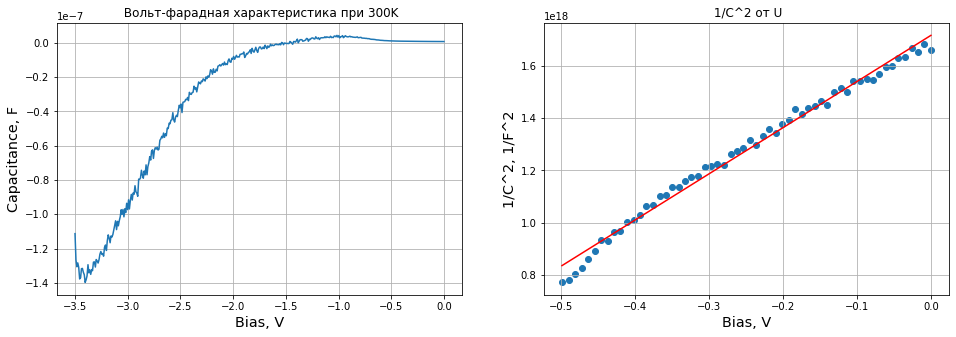

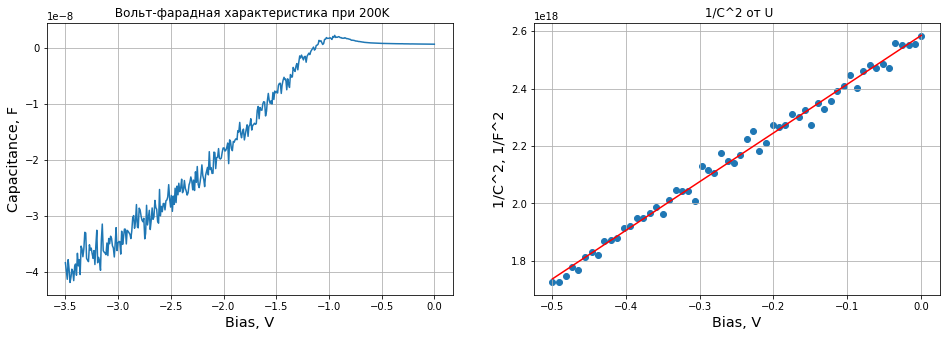

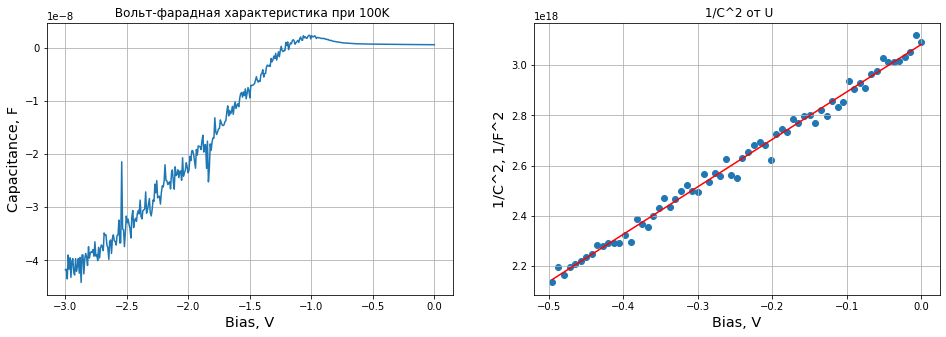

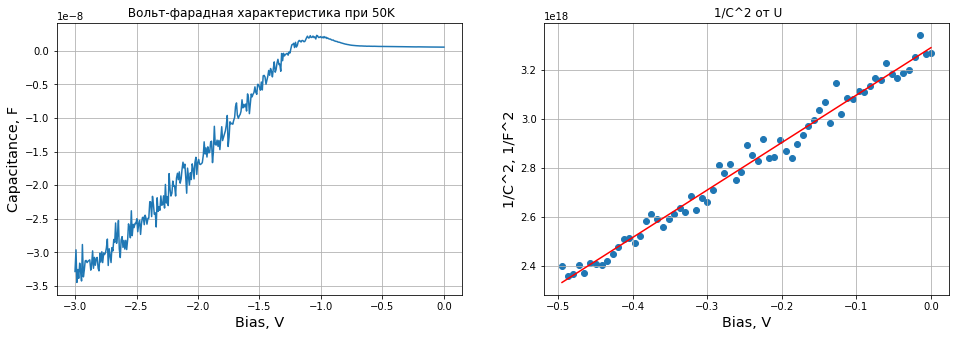

In [216]:
cv_char_plot(cap_10K300, -0.5, 1, 300, '10k')
cv_char_plot(cap_10K200, -0.5, 1, 200, '10k')
cv_char_plot(cap_10K100, -0.5, 2, 100, '10k')
cv_char_plot(cap_10K50, -0.5, 1.2, 50, '10k')

 
2.676e+18 x + 1.764e+18
V_d =  0.66 B
 
1.95e+18 x + 2.423e+18
V_d =  1.24 B
 
2.045e+18 x + 2.975e+18
V_d =  1.46 B
 
2.018e+18 x + 3.201e+18
V_d =  1.59 B


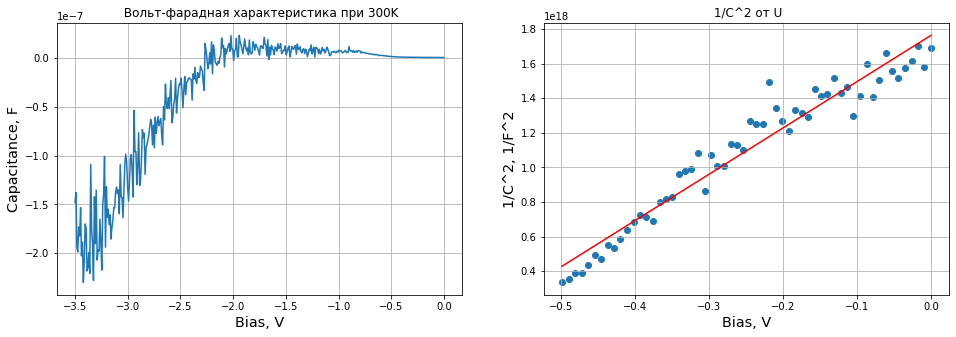

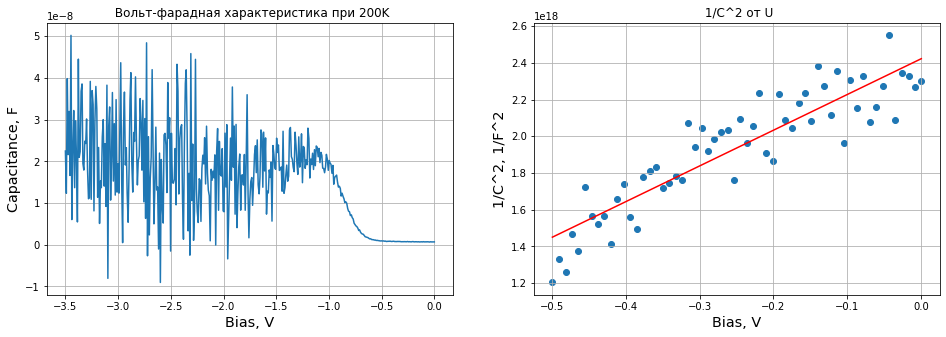

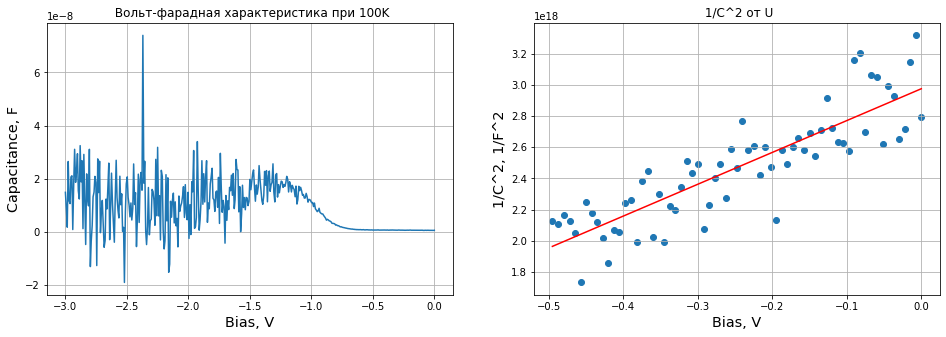

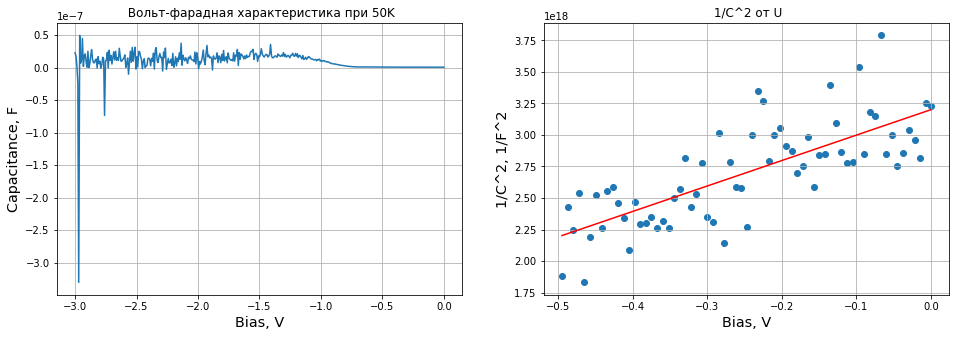

In [217]:
cv_char_plot(cap_1K300, -0.5, 1, 300, '1k')
cv_char_plot(cap_1K200, -0.5, 1, 200, '1k')
cv_char_plot(cap_1K100, -0.5, 2, 100, '1k')
cv_char_plot(cap_1K50, -0.5, 1.2, 50, '1k')

In [332]:
# График ВАХ и отдельного линейного участка
# Рассчитываем потенциал и сопротивление базы
def VAC_plot(data, V1, V2, t):
    fig, axs = plt.subplots(1, 2, gridspec_kw={'hspace': 0.25, 'wspace': 0.3}, figsize=(15,6))
    
    plt.subplot(121)
    plt.plot(data['Volt'],data['Amp'])
    plt.title(' Вольт-амперная характеристика. T={} K'.format(t))
    plt.xlabel('U, V',fontsize='x-large')
    plt.ylabel('I, A',fontsize='x-large')
    plt.grid()
    plt.yscale('log')

    plt.subplot(122)
    plt.plot(data['Volt'].loc[(data['Volt']>V1)&(data['Volt']<V2)],
             np.log(data['Amp'].loc[(data['Volt']>V1)&(data['Volt']<V2)]))
    plt.title('Линейный участок кривой')
    plt.xlabel('U, V',fontsize='x-large')
    plt.ylabel('I, A',fontsize='x-large')
    coefficients = np.polyfit(data['Volt'].loc[(data['Volt']>V1)&(data['Volt']<V2)],
                              np.log(data['Amp'].loc[(data['Volt']>V1)&(data['Volt']<V2)]), deg=1)
    poly = np.poly1d(coefficients)
    lin_fit = poly(data['Volt'].loc[(data['Volt']>V1)&(data['Volt']<V2)])
    plt.plot(data['Volt'].loc[(data['Volt']>V1)&(data['Volt']<V2)], lin_fit, color='red')
    
    plt.grid()
    
    I_0 = np.exp(poly[0])
    R = (1/poly[1]).round(2)
    phi_B = (np.exp(poly[0])*poly[1]).round(2)

    print('Уравненение апроксимационной прямой при T={} K'.format(t), poly)
    print('Рассчитанные параметры:')
    print('I_0 = ', f'{np.exp(poly[0]):.2e}', 'A')
    print('R = ',  (1/poly[1]).round(2), 'Ohm')
    print('phi_b = ', (poly[1]/poly[0]).round(2), 'V')
    plt.savefig('Graphs/VAC_{}.png'.format(t))
    

In [21]:
VAC_300 = (pd.read_csv('[2]VAC[2].txt', sep='\t'))
VAC_200 = (pd.read_csv('[2]VAC[4].txt', sep='\t'))
VAC_100 = (pd.read_csv('[2]VAC[5].txt', sep='\t'))
VAC_50 = (pd.read_csv('[2]VAC[6].txt', sep='\t'))

VAC_300 = VAC_300.replace(',', '.', regex=True).drop(columns=['N'], axis=1)
VAC_200 = VAC_200.replace(',', '.', regex=True).drop(columns=['N'], axis=1)
VAC_100 = VAC_100.replace(',', '.', regex=True).drop(columns=['N'], axis=1)
VAC_50 = VAC_50.replace(',', '.', regex=True).drop(columns=['N'], axis=1)

In [22]:
list_VAC = [VAC_300, VAC_200, VAC_100, VAC_50]

In [23]:
for name in list_VAC:
    name.Volt = pd.to_numeric(name.Volt)
    name.Amp = pd.to_numeric(name.Amp).abs()

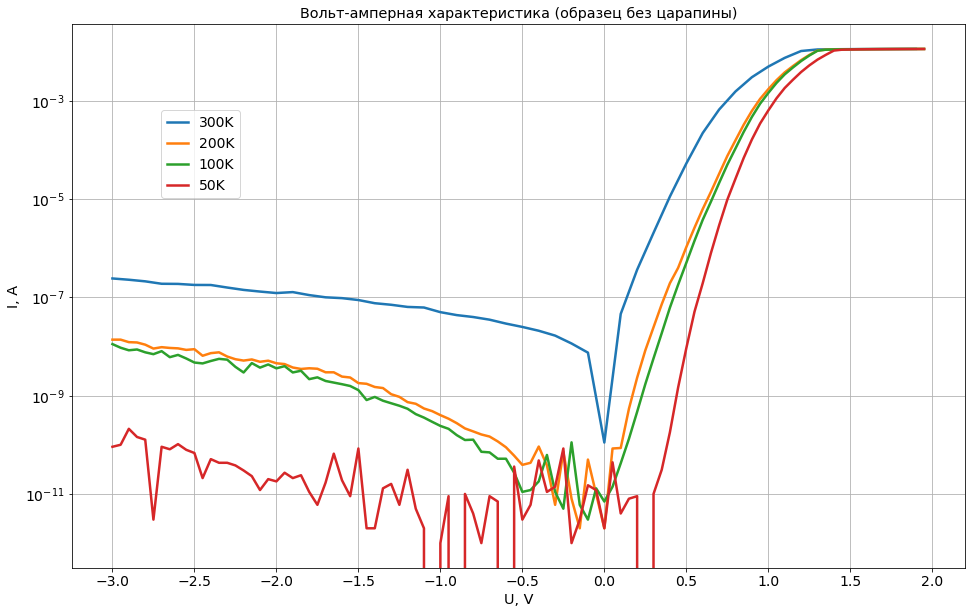

In [103]:
fig, axs = plt.subplots(figsize=(16,10))

axs.xaxis.set_major_locator(MultipleLocator(0.5))
for nm in list_VAC:
    axs = plt.plot(nm['Volt'].loc[nm['Volt']<2], nm['Amp'].loc[nm['Volt']<2],linewidth=2.5)

plt.yscale('log')

plt.title('Вольт-амперная характеристика (образец без царапины)', fontsize='x-large')
plt.legend(('300K', '200K','100K', '50K'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)
plt.xlabel('U, V',fontsize='x-large')
plt.ylabel('I, A',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()
plt.savefig('Graphs/VAC_all_Temps.png')

In [25]:
temps = [300,200,100,50]

Уравненение апроксимационной прямой при T=300 K  
16.85 x - 18.32
Рассчитанные параметры:
I_0 =  1.11e-08 A
R =  0.06 Ohm
phi_b =  -0.92 V


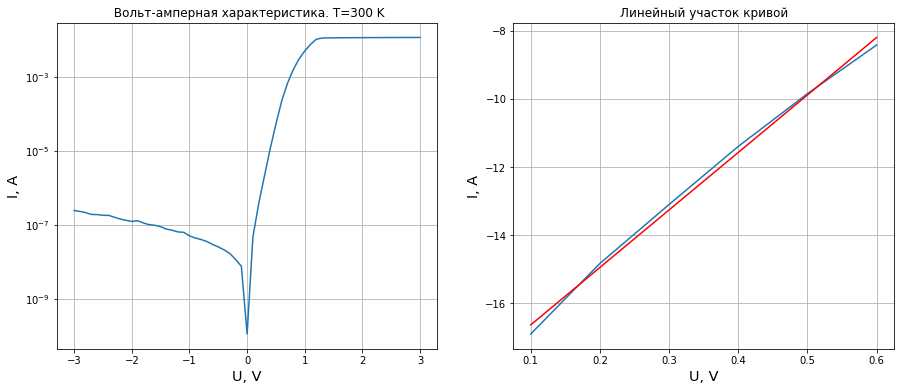

In [328]:
VAC_plot(VAC_300, 0,0.65, 300)  


Уравненение апроксимационной прямой при T=200 K  
22.03 x - 24.19
Рассчитанные параметры:
I_0 =  3.12e-11 A
R =  0.05 Ohm
phi_b =  -0.91 V


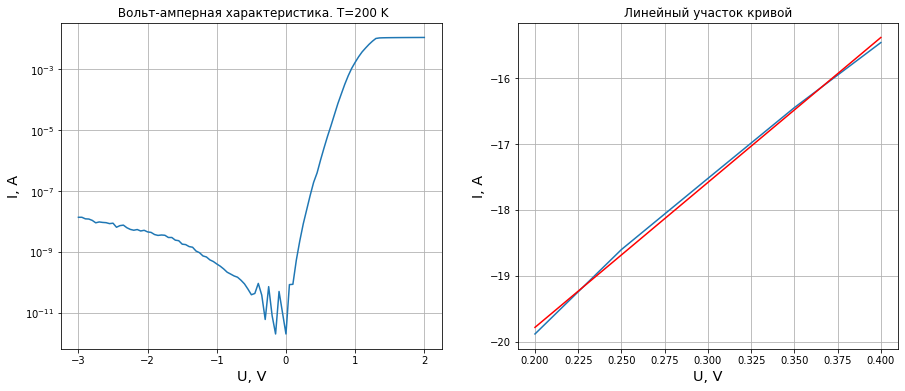

In [329]:
VAC_plot(VAC_200, 0.15,0.45, 200)   


Уравненение апроксимационной прямой при T=100 K  
24.18 x - 26.3
Рассчитанные параметры:
I_0 =  3.78e-12 A
R =  0.04 Ohm
phi_b =  -0.92 V


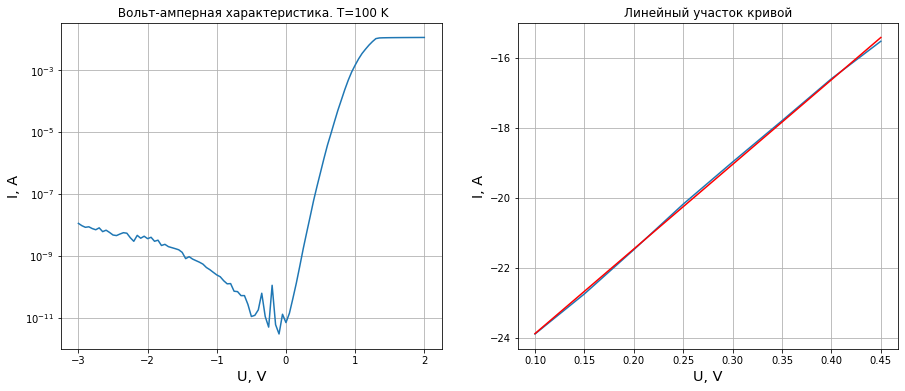

In [330]:
VAC_plot(VAC_100, 0.05,0.5, 100)   

Уравненение апроксимационной прямой при T=50 K  
29.02 x - 33.05
Рассчитанные параметры:
I_0 =  4.44e-15 A
R =  0.03 Ohm
phi_b =  -0.88 V


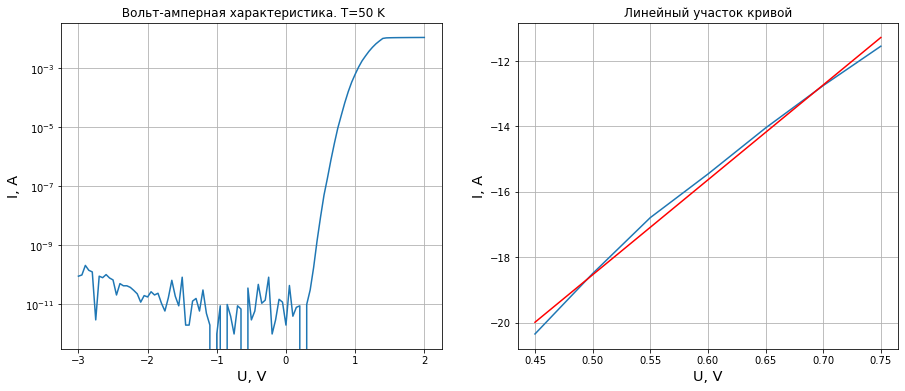

In [331]:
VAC_plot(VAC_50, 0.4,0.8, 50)   

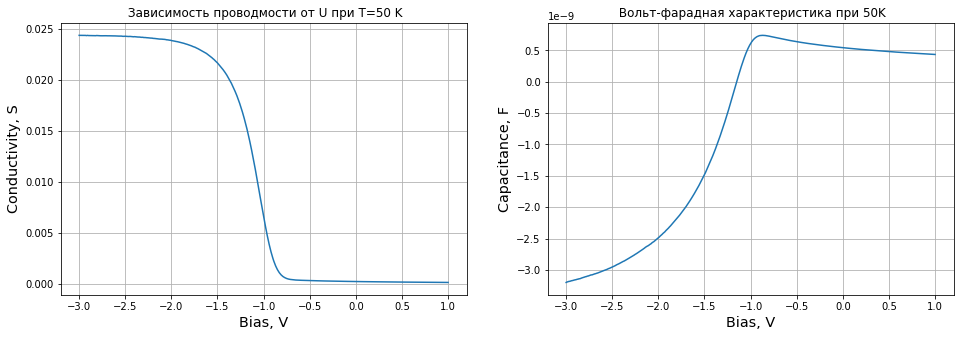

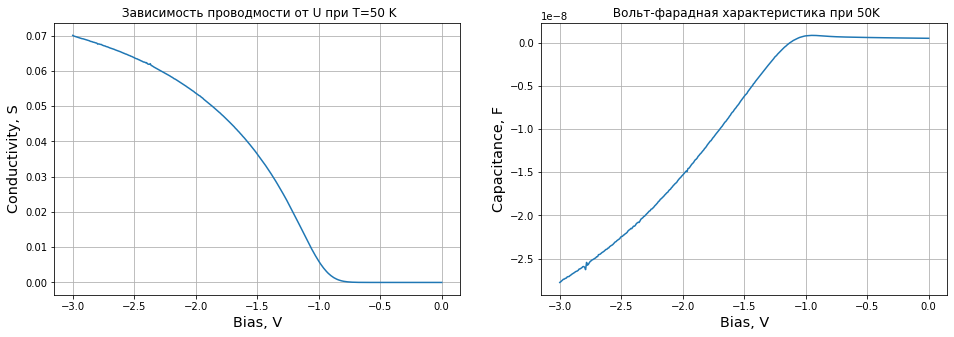

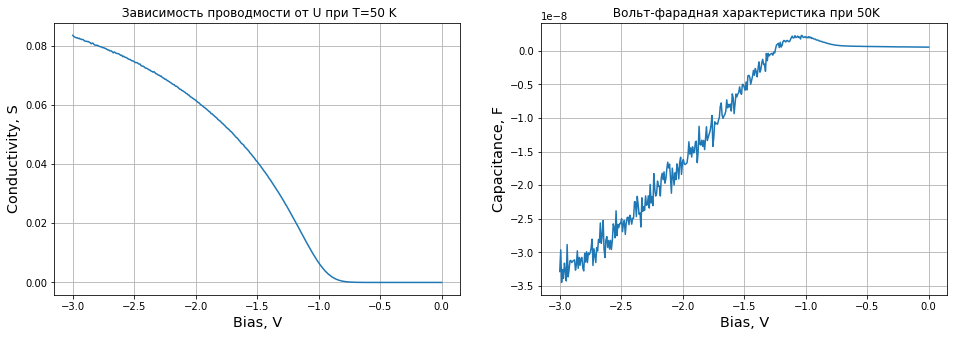

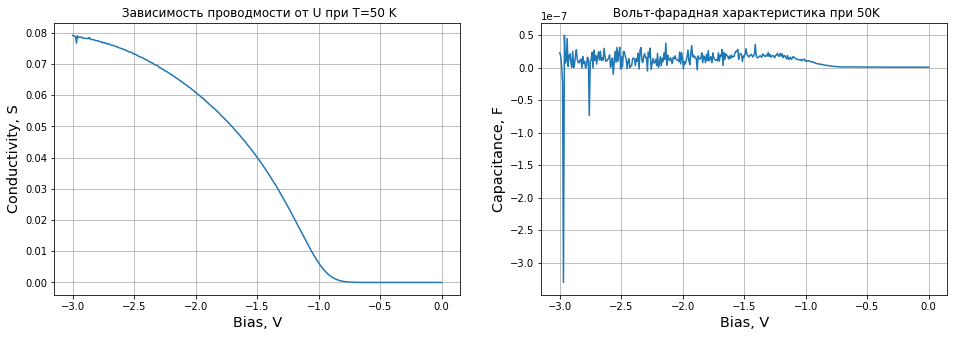

In [102]:
cgv_plot(cond_list_50, cap_list_50, 50)

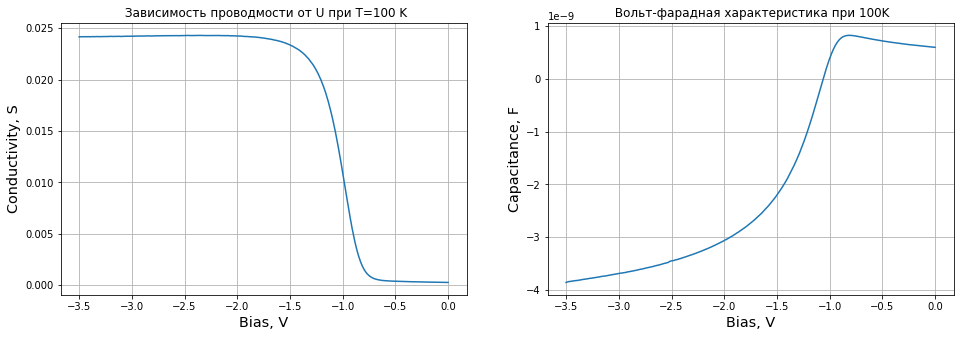

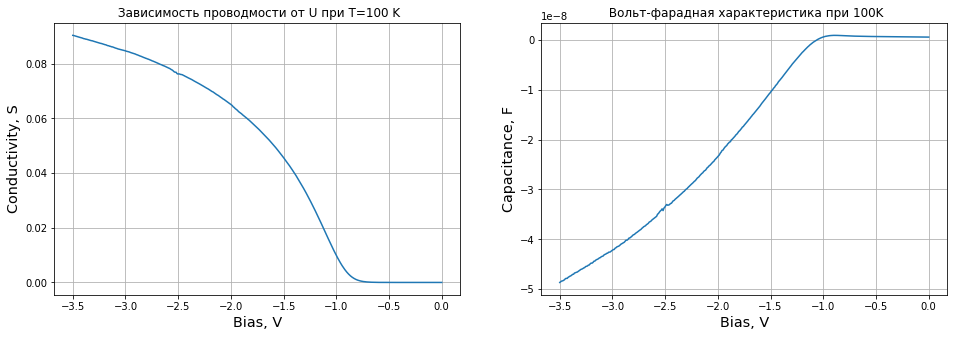

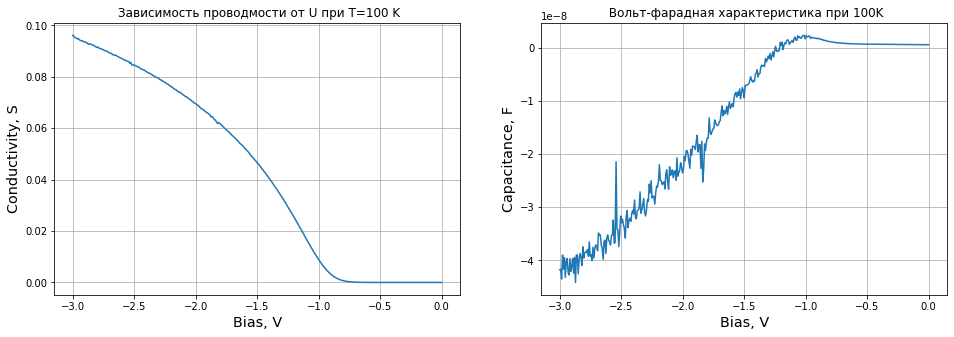

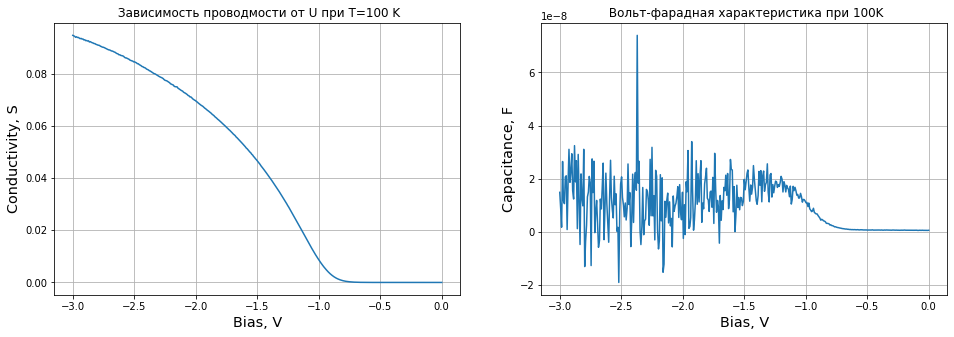

In [35]:
cgv_plot(cond_list_100, cap_list_100, 100)

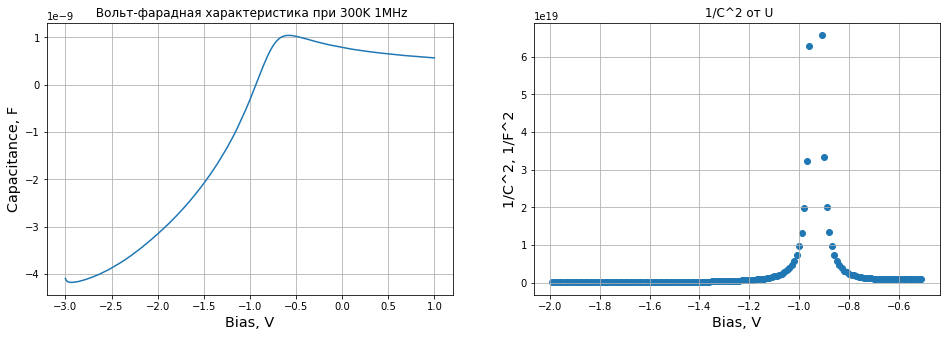

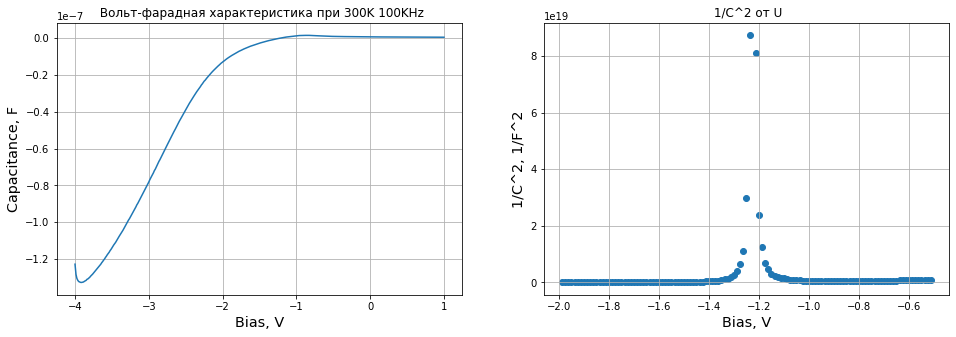

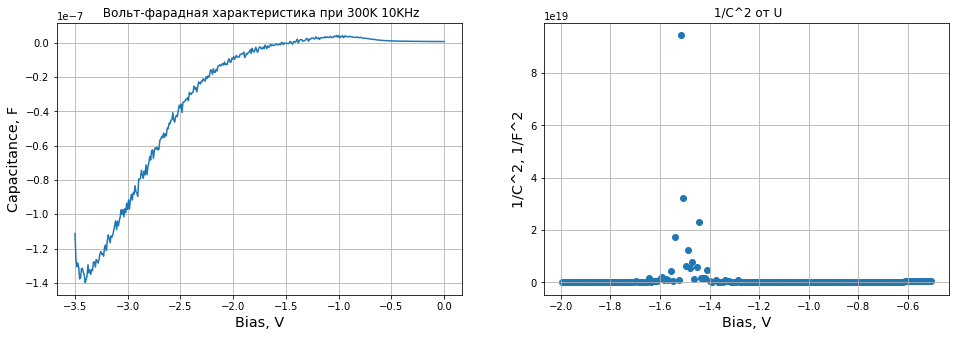

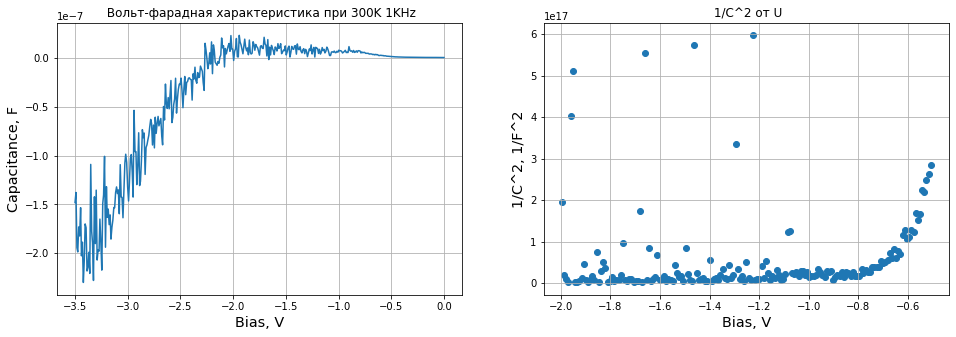

In [93]:
cv_plot(cap_list_300, 300, 1e20, -0.5)

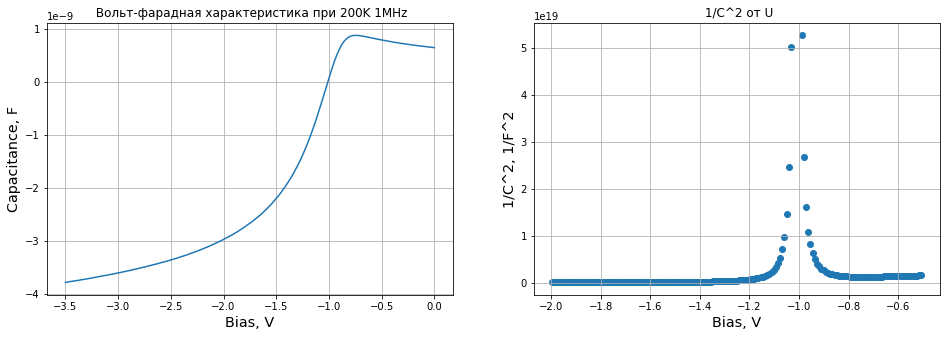

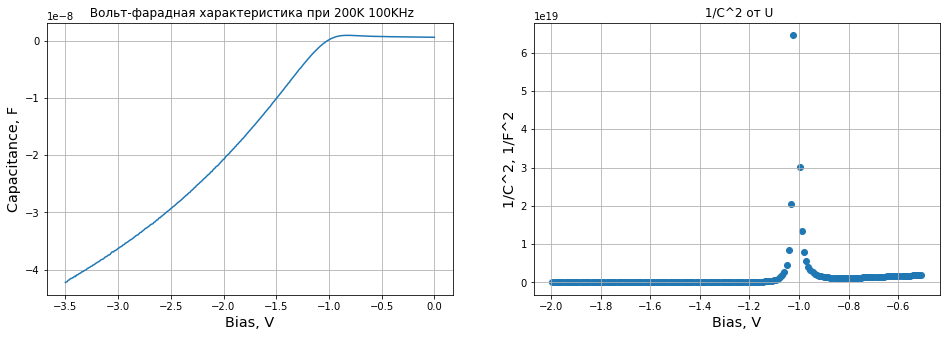

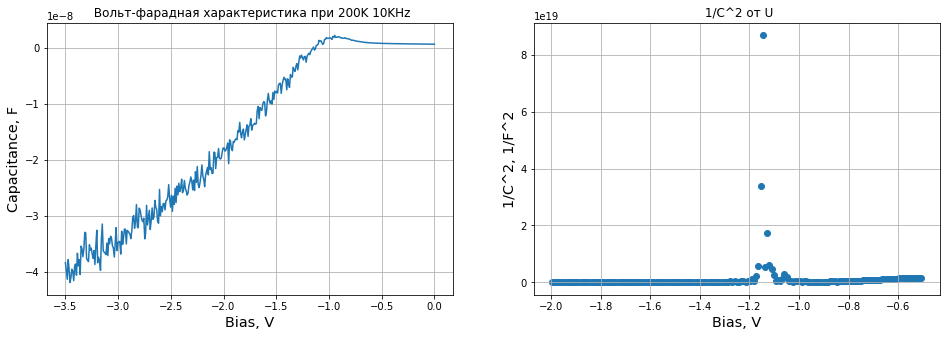

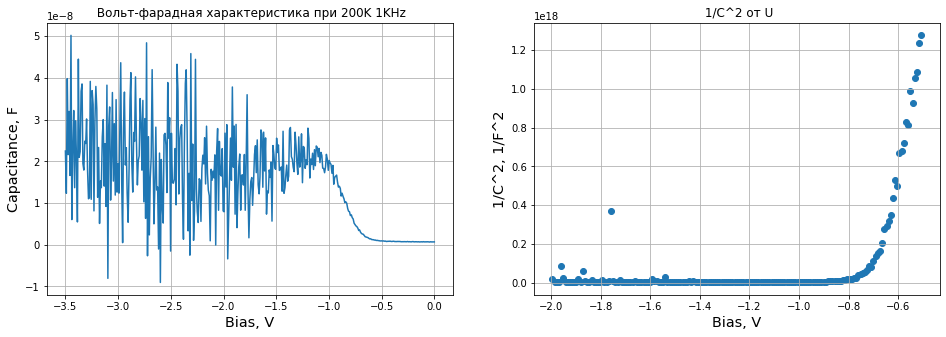

In [94]:
cv_plot(cap_list_200, 200, 1e20, -0.5)

<ipython-input-137-5872b7e556c2>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122)


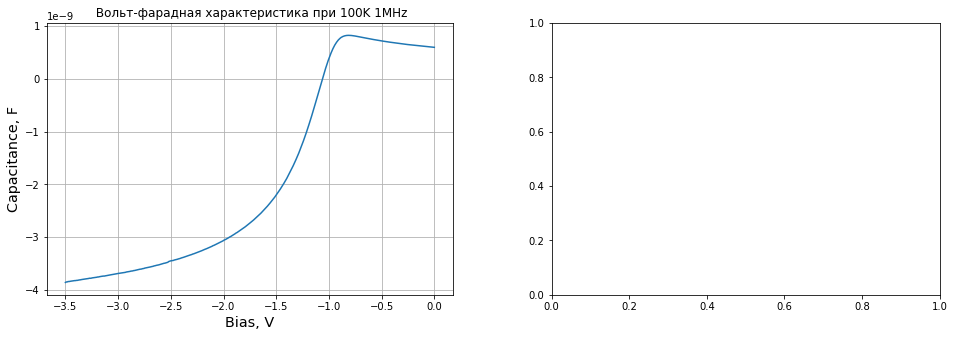

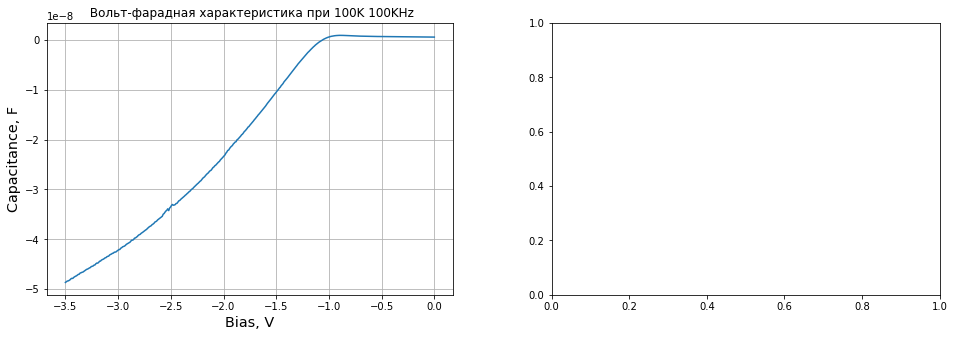

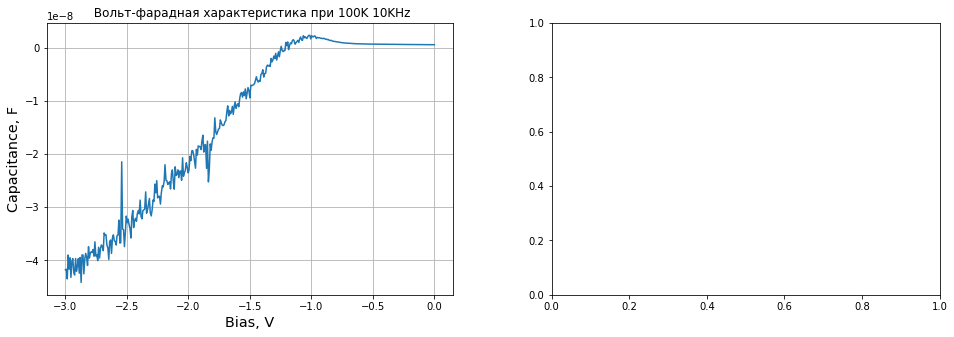

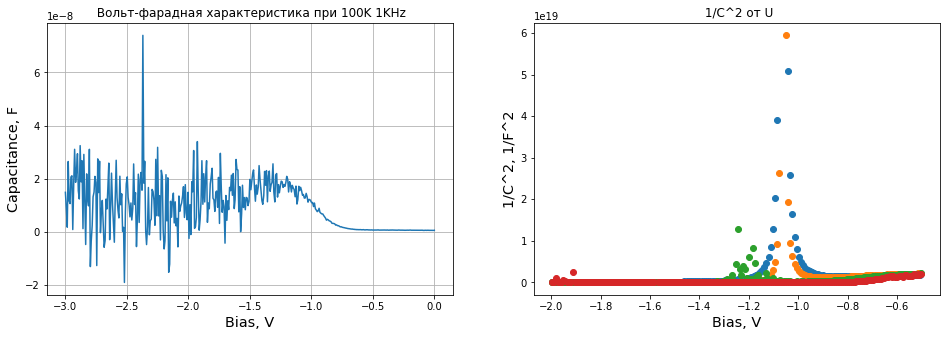

In [138]:
cv_plot(cap_list_100, 100, 1e20, -0.5)

In [284]:
eps = 9.7
print(3.14/4*(0.15)**2)
N_c = []

for i in [300, 200,100, 50]:
    N_c.append((2 * np.sqrt(2*constants.pi*0.2*constants.m_e*constants.k*i/((constants.h*100)**2))**3).round(-15))
    
print('N_c =', N_c)

0.0176625
N_c = [2.244e+18, 1.222e+18, 4.32e+17, 1.53e+17]


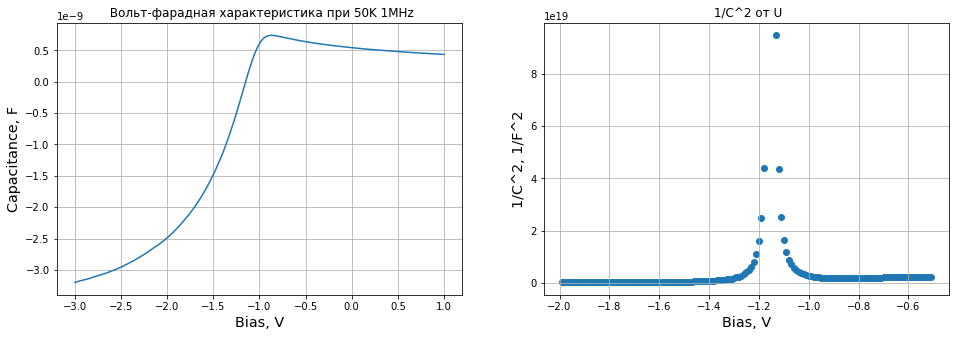

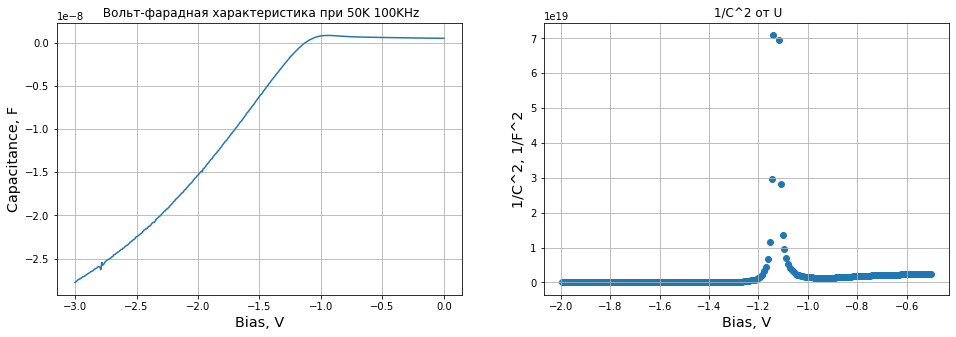

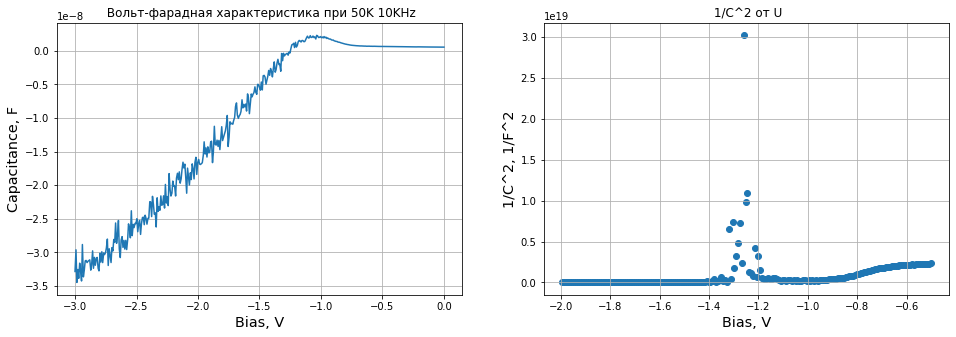

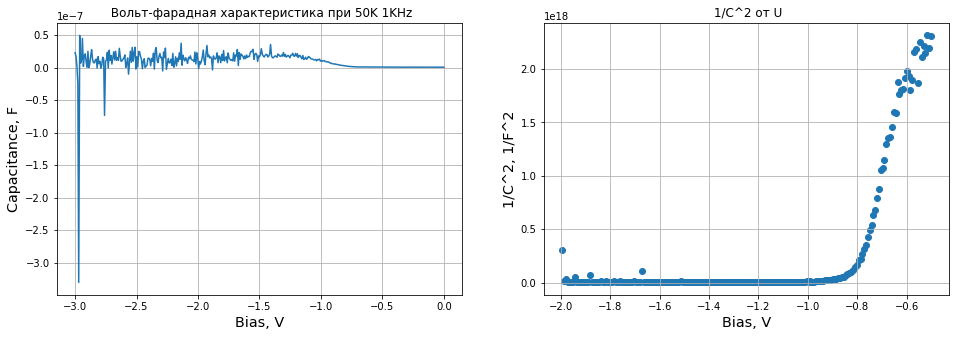

In [96]:
cv_plot(cap_list_50, 50, 1e20, -0.5)

In [321]:
Temps = [50, 100, 200, 300]
limit_list_right = [1, 1, 2, 1.2]
limit_list_left = [-0.5, -0.5, -0.5, -0.5]
i = 0
print('При температуре 50К')
for item in cap_list_50:
    print('Параметры для частоты', freqs[i])
    params(item, limit_list_left[i], limit_list_right[i], i, Temps[i])
    i+=1
    print()


При температуре 50К
Параметры для частоты 1MHz
 
1.874e+18 x + 3.394e+18
V_d =  0.55 B
N_d = 7.7573e+22
E_C - E_F =  -0.045 eV

Параметры для частоты 100KHz
 
1.977e+18 x + 3.531e+18
V_d =  0.56 B
N_d = 7.3527e+22
E_C - E_F =  -0.0948 eV

Параметры для частоты 10KHz
 
1.938e+18 x + 3.292e+18
V_d =  0.59 B
N_d = 7.4984e+22
E_C - E_F =  -0.2079 eV

Параметры для частоты 1KHz
 
2.018e+18 x + 3.201e+18
V_d =  0.63 B
N_d = 7.2036e+22
E_C - E_F =  -0.3377 eV



In [322]:
limit_list_right = [2, 2, 2, 1.2]
limit_list_left = [-0.5, -0.5, -0.5, -0.5]
i = 0
print('При температуре 100К')
for item in cap_list_100:
    print('Параметры для частоты', freqs[i])
    params(item, limit_list_left[i], limit_list_right[i], i, Temps[i])
    i+=1
    print()



При температуре 100К
Параметры для частоты 1MHz
 
1.721e+18 x + 2.78e+18
V_d =  0.62 B
N_d = 8.4452e+22
E_C - E_F =  -0.0454 eV

Параметры для частоты 100KHz
 
1.879e+18 x + 3.143e+18
V_d =  0.6 B
N_d = 7.7338e+22
E_C - E_F =  -0.0953 eV

Параметры для частоты 10KHz
 
1.891e+18 x + 3.082e+18
V_d =  0.61 B
N_d = 7.6846e+22
E_C - E_F =  -0.2083 eV

Параметры для частоты 1KHz
 
2.045e+18 x + 2.975e+18
V_d =  0.69 B
N_d = 7.1088e+22
E_C - E_F =  -0.3373 eV



In [323]:
i = 0
print('При температуре 200К')
for item in cap_list_200:
    print('Параметры для частоты', freqs[i])
    params(item, -0.5, 1, i, Temps[i])
    i+=1
    print()

При температуре 200К
Параметры для частоты 1MHz
 
1.624e+18 x + 2.426e+18
V_d =  0.67 B
N_d = 8.9487e+22
E_C - E_F =  -0.0456 eV

Параметры для частоты 100KHz
 
1.778e+18 x + 2.803e+18
V_d =  0.63 B
N_d = 8.1726e+22
E_C - E_F =  -0.0957 eV

Параметры для частоты 10KHz
 
1.7e+18 x + 2.586e+18
V_d =  0.66 B
N_d = 8.5508e+22
E_C - E_F =  -0.2102 eV

Параметры для частоты 1KHz
 
1.95e+18 x + 2.423e+18
V_d =  0.8 B
N_d = 7.4538e+22
E_C - E_F =  -0.3386 eV



In [324]:
limit_list_right = [1, 1, 1.2, 1.2]
i = 0
print('При температуре 300К')
for item in cap_list_300:
    print('Параметры для частоты', freqs[i])
    params(item, -0.5, limit_list_right[i] , i, Temps[i])
    i+=1
    print()


При температуре 300К
Параметры для частоты 1MHz
 
1.474e+18 x + 1.626e+18
V_d =  0.91 B
N_d = 9.8616e+22
E_C - E_F =  -0.0461 eV

Параметры для частоты 100KHz
 
1.555e+18 x + 1.791e+18
V_d =  0.87 B
N_d = 9.3453e+22
E_C - E_F =  -0.0969 eV

Параметры для частоты 10KHz
 
1.765e+18 x + 1.716e+18
V_d =  1.03 B
N_d = 8.2331e+22
E_C - E_F =  -0.2095 eV

Параметры для частоты 1KHz
 
2.676e+18 x + 1.764e+18
V_d =  1.52 B
N_d = 5.4318e+22
E_C - E_F =  -0.3304 eV

